<div align="center">
  <h1>Who Do Threat Actors Target in the Cyberspace? What Are They Looking For?</h1>
  <h2>CMPS 3160: Introduction to Data Science</h2>
  <h2>Presented by Sofiia Druchyna</h2>
  <h3><a href="https://sof0-0.github.io" target="_blank">GitHub.io Page</a></h3>
</div>


### Datasets and Project Description
We use two CISSM Cyber Events Datasets: <u>FullThreatActors.csv</u> and <u>FullAttackList.csv</u>. The data can be accessed [here](https://cissm.liquifiedapps.com/#table). <br>
The information in these datasets is particularly relevant for threat intelligence and cybersecurity studies, as it brings together open-source information surrounding a range of publically acknowledged cyber events in private and public organizations.<br> 
Numerous events from 2014 through the present have been coded to standardize information on threat actor, threat actor country, year and type of attack, motive, target, end effects, industry, and country of impact.

### Research Questions
Throughout this research project, we address several questions on the trends among emerging cyber threats and new victims in cyberspace: <br>

Based on the data from the FullThreatActors.csv dataset, we use several classifier models to categorize each threat actor based on specific characteristics and, therefore, answer the questions below:
1. Are there any characteristics we found in the dataset that allow us to classify various threat actors?
2. Can we perform the opposite operation by classifying the particular actor type based on the target country and the threat actor name?

Based on the data from the FullAttackList.csv dataset, we build a multi-class classifier and determine the motive of the attackers based on the victim's industry, country, and attack type. This technique allows us to respond to some of the crucial inquiries when considering the attacks in cyberspace:
1. What are the most essential characteristics defining the attack's motive?
2. Can we claim that only certain types of motives are present per industry or country?
3. Is there a direct correlation between the victim's characteristics and the attacker's motive or the type of attack?

### Methods

**Data Processing and Cleaning** <br>

- In both datasets, the entries had "NaN" or "Undetermined" values, which were dropped.
- Both datasets had long variable names, which were mapped to the shorter alternatives for neat plotting.
- The "Date" variables were converted to the date-time format for future calculations, and the "Year" variable was extracted from the "Date" to determine the existing trends.

**Original Experiments with Datasets** <br>

We explore the trends in the datasets using existing features and provide several bar plots to display the distribution of the particular characteristic. We further use grouping and filtering techniques to analyze on the subsets of data. Lastly, we create several pivot tables and data cubes to simultaneously display the sample count using several variables.

**Modeling Description** <br>

Having these questions as our main objectives, I have built the KNN Classifier, SVM Classifier, and Decision Tree Classifier and experimented with various features, further performing the cross-validation to get the best prediction score on the new data. 

Moreover, I have compared various model types (KNN vs SVC vs DT Classifiers) and determined the best model based on the cross-variable predictions (identifying trends between the attack Types and the Sub-Type from the same dataset) vs the cross-sets predictions (predicting the victim based on the attacker's characteristics and Motive, or the Country; or, determining the attacker's Type based on the victim's main characteristics).


**Modeling Features/Labels** <br>

From the FullThreatActors.csv: <br>
- Use the Actor Type, Country to predict the Threat Actor Name.
- Use the Name, Country to predict the Actor Type.

From the FullAttackList.csv: <br>
- Use victim's Location, Industry to predict the Motive.
- Use the victim's Location, Industry, and Actor Location to predict the Motive 
- Having the actor Location, Type, and the Motive, can we predict the Country and the Industry of the victim for the next attack?


In [407]:
# Import all modules/packets imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore") 

### Threat Actors Dataset

**Objectives** <br>

From the <u>FullThreatActors.csv</u>, we can see all detected Threat Actors. Having the characteristics of each sample, in the original experiments, we identify the existing trends among threat actors, as well as the timeline of their activity. Below are the questions we will respond throughout this section:

- Question 1. What are the trends among the cyber threat actors (if there are any) regarding the country origin?
- Question 2. What are the trends among the cyber threat actors regarding their type? 
- Question 3. Were the same threat actors seen multiple times?
- Question 4. Did multiple threat actors act around the same time? If so, does it happen more often that not?

In [ ]:
df_threats = pd.read_csv('./FullThreatActors.csv') 
display(df_threats)

In [189]:
unique_df = df_threats.drop_duplicates() # handle the duplicates in the dataset
display(unique_df)

,Name,Country,Actor Type,Established,Last Seen
0,$2a$45,Undetermined,Criminal,NaN,2018-03-09
1,'desserped',Undetermined,Criminal,NaN,2023-10-11
2,0mega,Undetermined,Criminal,NaN,2023-02-20
3,0x0D1337,Undetermined,Undetermined,NaN,2015-09-30
4,0x2Taylor,Undetermined,Hacktivist,NaN,2016-10-13
...,...,...,...,...,...
1114,Zhengquan Zhang,Undetermined,Undetermined,NaN,2017-04-23
1115,Zukr@in,Pakistan,Hacktivist,NaN,2014-10-09
1116,Zurael_sTz,Iran (Islamic Republic of),Hacktivist,NaN,2016-08-02
1117,Zyklon,Undetermined,Hobbyist,NaN,2015-02-03


From this output, we identify that each attack is now unique and that there are no duplicates. Therefore, ;multiple occurences of the same threat actor are not recorded.

In [190]:
df_threats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1118 non-null   object 
 1   Country      1117 non-null   object 
 2   Actor Type   1118 non-null   object 
 3   Established  0 non-null      float64
 4   Last Seen    1118 non-null   object 
dtypes: float64(1), object(4)
memory usage: 47.0+ KB


As we can see from the output above, most of the threat actors' origins were undetermined. However, it is important to point out that among the ones that were identified, United States and Iran were in the leading positions.

In [191]:
# Clean the data for the following diagrams (remove Undetermined after we identified the amount of untracked threats):
filtered_df = df_threats[(df_threats['Actor Type'] != 'Undetermined') & (df_threats['Country'] != 'Undetermined') & (df_threats['Established'] != 'Undetermined') & (df_threats['Last Seen'] != 'Undetermined')]
filtered_df = filtered_df.drop(columns = ['Established']) # drop the Established column as all of them are NaN
filtered_df.dropna(inplace = True)
filtered_df

,Name,Country,Actor Type,Last Seen
44,@THTHerakles,Turkey,Hacktivist,2015-04-13
51,A. S. A. L. A.,Armenia,Hacktivist,2015-11-11
53,Abdellah Elmaghribi,United States of America,Hacktivist,2015-10-15
54,Abdellah Elmaghribi; Moroccan Wolf,Turkmenistan,Hacktivist,2015-04-09
56,Absa employee,South Africa,Criminal,2020-10-27
...,...,...,...,...
1108,Z Company Hacking Crew,India,Hacktivist,2014-10-27
1109,Zarya,Russian Federation,Hacktivist,2022-08-19
1112,Zer0Pwn,Syrian Arab Republic,Hacktivist,2014-04-06
1115,Zukr@in,Pakistan,Hacktivist,2014-10-09


So here, after we cleaned data, we went from 1200 units of observation to around 500 ones with no missing values.

In [192]:
filtered_df['Country'].value_counts()


Country
Russian Federation            72
United States of America      69
Iran (Islamic Republic of)    35
China                         34
India                         32
                              ..
Cuba                           1
Jordan                         1
Ghana                          1
Armenia                        1
Rwanda                         1
Name: count, Length: 78, dtype: int64

<Axes: xlabel='Country'>

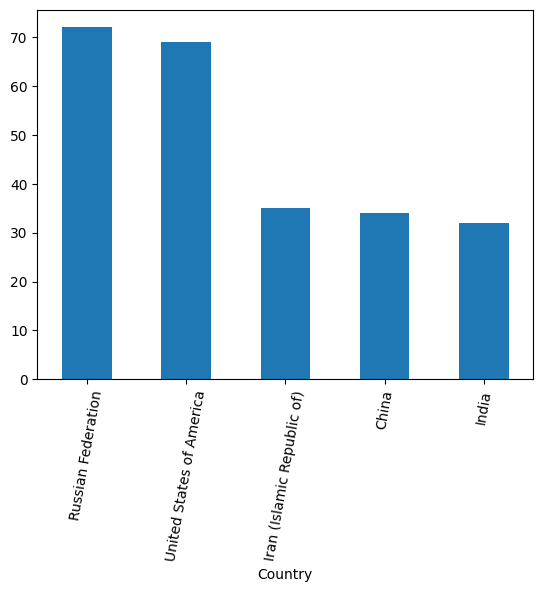

In [193]:
filtered_df['Country'].value_counts().head().plot.bar(rot=80)

In [194]:
us_attacks = filtered_df[filtered_df.Country == "United States of America"] # actor's country is USA
us_attacks

,Name,Country,Actor Type,Last Seen
53,Abdellah Elmaghribi,United States of America,Hacktivist,2015-10-15
78,AlfabetoVirtual,United States of America,Hacktivist,2015-07-10
93,Amped Attacks AKA sgtbilko420,United States of America,Hacktivist,2015-10-21
99,AnonCoder,United States of America,Hacktivist,2015-05-23
137,Anonymous (USA),United States of America,Hacktivist,2020-06-14
...,...,...,...,...
1064,US Cyber Command,United States of America,Nation-State,2022-06-01
1069,Vanda The God,United States of America,Hacktivist,2021-03-19
1070,VandaTheGod,United States of America,Hacktivist,2019-08-17
1075,Vigilance,United States of America,Hacktivist,2017-06-20


We can observe that most attacks conducted by United States were actually recorded around the same time: a year of 2015 with the same attack type of hactivism, indicating that these attacks may be the actual series of cybercrimes or related to a certain vulnerability present at a time.

In [195]:
iran_attacks = filtered_df[filtered_df.Country == "Iran (Islamic Republic of)"] # actor's country is Iran
iran_attacks

,Name,Country,Actor Type,Last Seen
58,Adalat Ali,Iran (Islamic Republic of),Hacktivist,2022-02-01
65,Agrius APT,Iran (Islamic Republic of),Nation-State,2022-02-28
73,al-Tahera,Iran (Islamic Republic of),Hacktivist,2022-07-12
81,Ali's Justice (Edalat-e Ali),Iran (Islamic Republic of),Hacktivist,2023-02-11
88,Altahrea Team,Iran (Islamic Republic of),Hacktivist,2022-07-18
118,Anonymous (Iran),Iran (Islamic Republic of),Hacktivist,2020-01-10
149,Anti WMD Team,Iran (Islamic Republic of),Hacktivist,2014-02-10
159,APT39,Iran (Islamic Republic of),Nation-State,2019-03-04
164,Arvin Club,Iran (Islamic Republic of),Criminal,2021-11-09
208,BlackMagic,Iran (Islamic Republic of),Hacktivist,2022-12-07


In [196]:
filtered_df['Actor Type'].value_counts()

Actor Type
Hacktivist      291
Nation-State     95
Criminal         71
Hobbyist         19
Terrorist         6
Name: count, dtype: int64

From the output above, we can observe that the most common Actor Type is Hactivism and the least popular type is Terrorism.

<Axes: xlabel='Actor Type'>

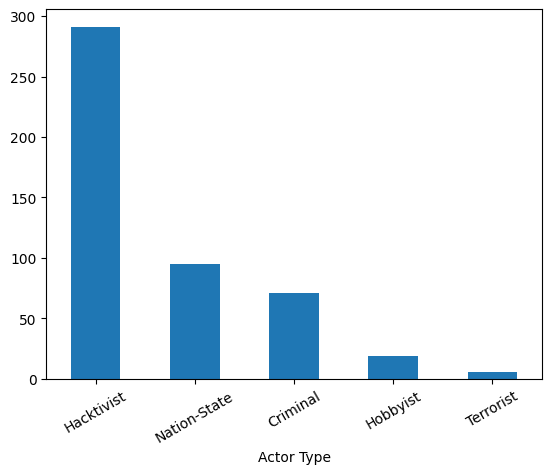

In [197]:
filtered_df['Actor Type'].value_counts().plot.bar(rot=30)

Furthermore, from the Attack Type, we can infer that although majority of attacks remained undetermined, one of the leading attack types was <ins>Hactivism</ins>, followed by criminal motives.

In [198]:
# Create the pivot table to display the actor count using Country and Actor Type variables
pivot_threats = (filtered_df.
                   groupby('Country')['Actor Type'].
                   value_counts())
pivot_threats.to_frame()

count
Country                            Actor Type         
Afghanistan                        Nation-State      3
                                   Hobbyist          1
Albania                            Hacktivist        1
Algeria                            Hacktivist        1
Armenia                            Hacktivist        1
...                                                ...
Uzbekistan                         Nation-State      1
Venezuela (Bolivarian Republic of) Hacktivist        1
Viet Nam                           Criminal          1
                                   Hobbyist          1
                                   Nation-State      1

[127 rows x 1 columns]

In [199]:
# Group the data by Country and Actor type
piv_by_country_actor = filtered_df.groupby(['Country', 'Actor Type']).size().reset_index(name='count')

# Find the country with max count for each Actor Type using the count as indexing
max_count = piv_by_country_actor.loc[piv_by_country_actor .groupby('Actor Type')['count'].idxmax()]
print(max_count)

                      Country    Actor Type  count
87         Russian Federation      Criminal     30
119  United States of America    Hacktivist     45
120  United States of America      Hobbyist      5
25                      China  Nation-State     26
103      Syrian Arab Republic     Terrorist      3


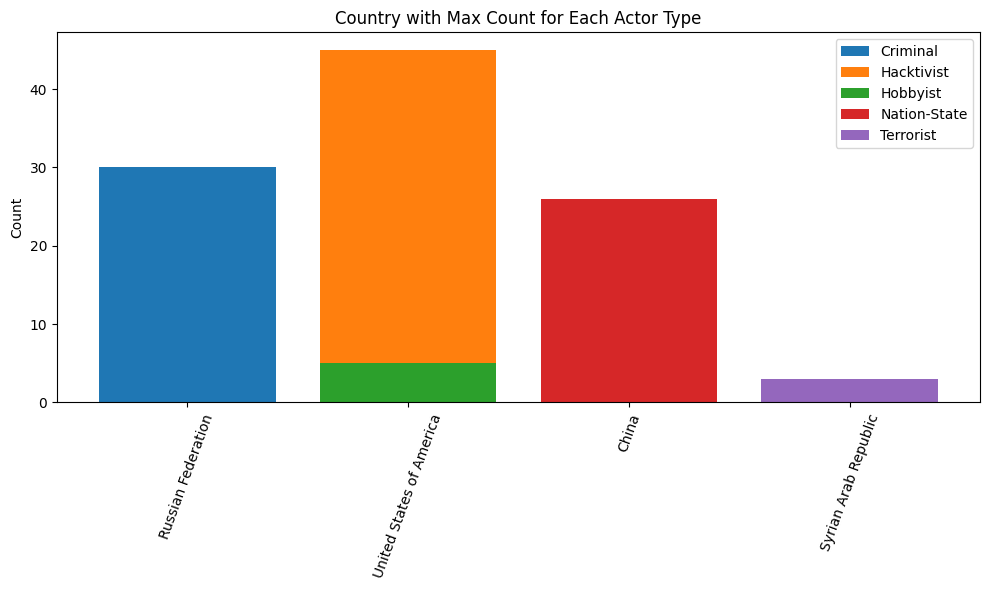

In [200]:
plt.figure(figsize=(10, 6))
for actor in max_count['Actor Type'].unique():
    data = max_count[max_count['Actor Type'] == actor]
    plt.bar(data['Country'], data['count'], label=actor)


plt.ylabel('Count')
plt.title('Country with Max Count for Each Actor Type')
plt.xticks(rotation=70)
plt.legend()
plt.tight_layout()
plt.show()

In [201]:
# Convert the pivot table to the dataframe for the plotting
pivot_thr_df = pivot_threats.to_frame().reset_index()
pivot_thr_df.columns = ['Country', 'Actor Type', 'count']

# Group the pivot table by the actor type to find all the counts per actor type (further pass to the country)
max_counts = pivot_thr_df.groupby('Actor Type')['count'].transform('max') # identify the max after grouping by the actor type (those are the max counts per type)

In [202]:
# Now we can display the countries with the max count per each Actor Type
countries_with_max_count = pivot_thr_df[pivot_thr_df['count'] == max_counts]
countries_with_max_count

,Country,Actor Type,count
23,China,Nation-State,26
87,Russian Federation,Criminal,30
103,Syrian Arab Republic,Terrorist,3
118,United States of America,Hacktivist,45
120,United States of America,Hobbyist,5


From this plot and the table, we were able to see the leading countries (with the most occurences per each attack type): <br>
- **Nation-State Actors** : China. <br>
- **Criminal Actors**: Russian Federation. <br>
- **Terrorist Actors**: Syrian Arab Republic. <br>
- **Hacktivist Actors**: USA. <br>
- **Hobbyist**: USA. <br>

This result shows that there is a correlation between the actor type and the attacker's country as only particular actor types are originating from specific countries.

In [203]:
# Extract the "Year" metric for the tidier data and our convenience:
filtered_df['Year'] = pd.to_datetime(filtered_df['Last Seen']).dt.year 
filtered_df['Year']

44      2015
51      2015
53      2015
54      2015
56      2020
        ... 
1108    2014
1109    2022
1112    2014
1115    2014
1116    2016
Name: Year, Length: 482, dtype: int32

<Axes: xlabel='Year'>

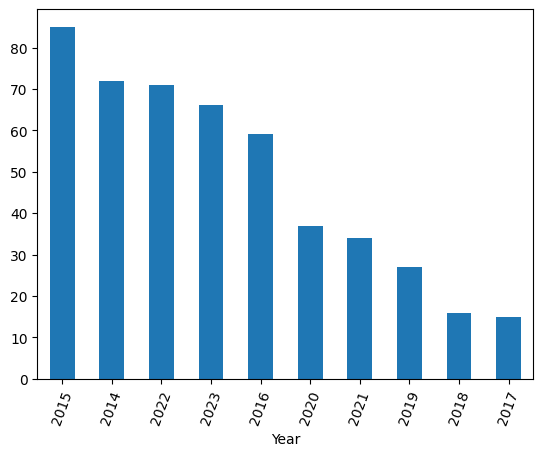

In [204]:
filtered_df['Year'].value_counts().plot.bar(rot=70)

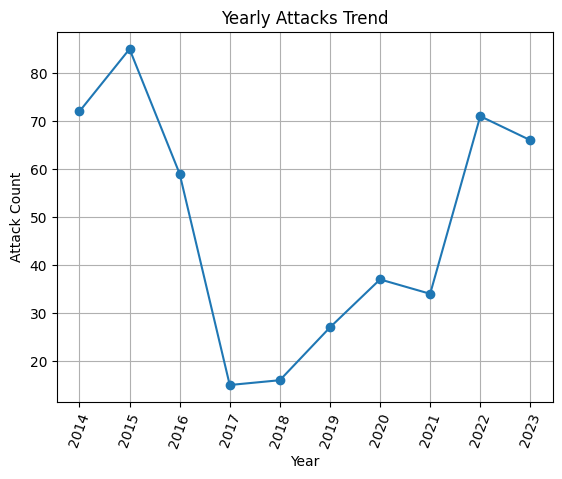

In [205]:
# Count the attack occurrences of each year
year_counts = filtered_df['Year'].value_counts().sort_index()

plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Attack Count')
plt.title('Yearly Attacks Trend')
plt.xticks(year_counts.index, rotation=70) 
plt.grid(True)
plt.show()

Using this chart, we can clearly see how the trend of cyber-attacks significantly increased in 2015, 2020, and 2022. On the other hand, only a few attacks were recorded between 2017 and 2019, as we notice the major difference in the cybercrime count compared to the data from 2014 and 2023 at the ends of that interval. 

In [206]:
threats_cube = filtered_df.pivot_table(
    index="Country", columns=['Actor Type'],
    values='Year', aggfunc='count')                         
threats_cube

Actor Type,Criminal,Hacktivist,Hobbyist,Nation-State,Terrorist
Country,,,,,
Afghanistan,NaN,NaN,1.0,3.0,NaN
Albania,NaN,1.0,NaN,NaN,NaN
Algeria,NaN,1.0,NaN,NaN,NaN
Armenia,NaN,1.0,NaN,NaN,NaN
Australia,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland,3.0,6.0,NaN,1.0,NaN
United States of America,15.0,45.0,5.0,4.0,NaN
Uzbekistan,NaN,NaN,NaN,1.0,NaN


This data cube allows us to see different Actor Types per each country, so we can further determine the types of cyber-attacks (or threat actors) that each country is conducting. 

### Cyber-Attacks Dataset

**Objectives** <br>

In the <u>FullAttackList.csv</u> dataset, we can see all detected <ins>CyberAttacks.</ins> This dataset is especially interesting for the data analysis as there are several characteristics that we can try to find
correlation among by responding the following questions: <br>
- Question 1. When did most attacks occur?
- Question 2. What was the most common victim? Did those victims vary by their income?
- Question 3. What industry was targeted the most?
- Question 4. What are some of the most common actor locations?
- Question 5. What are some of the most common motives?
- Question 6. What are some of the most common attack types? And what were the sub-types of those attacks?
- Question 7. Is there a correlation among all these variables? 


In [207]:
df_attack = pd.read_csv('./FullAttackList.csv')
df_attack

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
0,2023-10-31,United States of America,Smoothie King,Accommodation and Food Services,Undetermined,Undetermined,Financial,Exploitive,Undetermined
1,2023-10-31,Italy,Avangate,Other Services (except Public Administration),Undetermined,Alpha Team,Financial,Mixed,Data Attack
2,2023-10-30,United States of America,Dallas County,Public Administration,Undetermined,PLAY,Financial,Mixed,Data Attack
3,2023-10-30,Russian Federation,National Payment Card System (NSPK),Finance and Insurance,Ukraine,DumpForums and Ukrainian Cyber Alliance,Protest,Disruptive,Message Manipulation
4,2023-10-30,Germany,Südwestfalen IT,"Professional, Scientific, and Technical Services",Undetermined,Undetermined,Financial,Mixed,Data Attack
...,...,...,...,...,...,...,...,...,...
4095,2022-03-31,Undetermined,Undisclosed organization,Undetermined,Russian Federation,ALPHVM,Financial,Disruptive,Data Attack
4096,2022-03-31,United Kingdom of Great Britain and Northern I...,Individuals in the UK,Retail Trade,Undetermined,Undetermined,Financial,Exploitive,Exploitation of End Hosts
4097,2022-03-31,Spain,Iberdrola,Utilities,Undetermined,Undetermined,Financial,Exploitive,Exploitation of Application Server
4098,2022-03-31,Undetermined,Ola Finance,Finance and Insurance,Undetermined,Undetermined,Financial,Exploitive,Exploitation of Application Server


In [208]:
df_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            4100 non-null   object
 1   Location        4100 non-null   object
 2   Victim          4100 non-null   object
 3   Industry        4080 non-null   object
 4   Actor Location  4100 non-null   object
 5   Actor           4100 non-null   object
 6   Motive          4100 non-null   object
 7   Type            4100 non-null   object
 8   Sub-Type        4078 non-null   object
dtypes: object(9)
memory usage: 288.4+ KB


In [209]:
# Clean up the data to remove the Undetermined values from every column:
filtered_att = df_attack[(df_attack['Location'] != 'Undetermined') & (df_attack['Victim'] != 'Undetermined') & (df_attack['Industry'] != 'Undetermined') & (df_attack['Actor Location'] != 'Undetermined') & (df_attack['Actor'] != 'Undetermined') & (df_attack['Motive'] != 'Undetermined') & (df_attack['Type'] != 'Undetermined') & (df_attack['Sub-Type'] != 'Undetermined')]
filtered_att

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
3,2023-10-30,Russian Federation,National Payment Card System (NSPK),Finance and Insurance,Ukraine,DumpForums and Ukrainian Cyber Alliance,Protest,Disruptive,Message Manipulation
7,2023-10-30,United Kingdom of Great Britain and Northern I...,Manchester Airport,Public Administration,Russian Federation,UserSec,Protest,Disruptive,External Denial of Services
8,2023-10-30,United Kingdom of Great Britain and Northern I...,Manchester Airport,Public Administration,Russian Federation,UserSec,Protest,Disruptive,External Denial of Services
16,2023-10-27,Russian Federation,"Three Russian internet providers, Miranda-medi...",Information,Ukraine,Ukrainian IT Army,Protest,Disruptive,External Denial of Services
17,2023-10-27,Sweden,Spotify,Information,Sudan,Anonymous Sudan,Protest,Disruptive,External Denial of Services
...,...,...,...,...,...,...,...,...,...
4073,2022-04-05,Russian Federation,EGAIS,Public Administration,Ukraine,Ukraine IT Army,Protest,Disruptive,External Denial of Service
4074,2022-04-05,Portugal,Sonae,Retail Trade,Russian Federation,GOLD DUPONT,Financial,Mixed,Data Attack
4084,2022-04-02,Germany,Nordex,Manufacturing,Russian Federation,WIZARD SPIDER,Financial,Disruptive,Data Attack
4090,2022-04-01,United States of America,Metagenics,Manufacturing,Russian Federation,Cuba,Financial,Mixed,Data Attack


In [210]:
filtered_att['Date']

3       2023-10-30
7       2023-10-30
8       2023-10-30
16      2023-10-27
17      2023-10-27
           ...    
4073    2022-04-05
4074    2022-04-05
4084    2022-04-02
4090    2022-04-01
4094    2022-03-31
Name: Date, Length: 957, dtype: object

In [211]:
# Extract the "Year" metric for the plotting, so create the new column in the dataset:
filtered_att['Year'] = pd.to_datetime(filtered_att['Date']).apply(lambda x: x.year)

In [212]:
filtered_att['Location'].unique() # some of these locations are too lengthy to display on the plot, so we create a mapping to the shorter names

array(['Russian Federation',
       'United Kingdom of Great Britain and Northern Ireland', 'Sweden',
       'United States of America', 'Canada', 'Israel', 'Germany',
       'Ukraine', 'Italy', 'Philippines', 'India', 'Hong Kong',
       'Australia', 'Czechia', 'Japan', 'France', 'Netherlands',
       'Pakistan', 'Kenya', 'Saint Vincent and the Grenadines', 'Estonia',
       'South Africa', 'Belarus', 'Ireland', 'Mali', 'Switzerland',
       'Korea (the Republic of)', 'Chile',
       'Venezuela (Bolivarian Republic of)', 'Guatemala', 'Brazil',
       'Belgium', 'Mexico', 'Finland', 'Denmark', 'Spain', 'Poland',
       'Dominican Republic', 'Iran (Islamic Republic of)', 'Slovakia',
       'Lithuania', 'Latvia', 'Cuba', 'Viet Nam', 'United Arab Emirates',
       'Austria', 'Colombia', 'Argentina',
       'Bonaire, Sint Eustatius and Saba', 'Moldova (the Republic of)',
       'Bulgaria', 'Malaysia', 'Greece', 'Norway', 'China', 'Peru',
       'Ecuador', 'Croatia', 'Kazakhstan', 'Romania'

In [213]:
location_mapping = {
    'Korea (the Republic of)': 'South Korea',
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran (Islamic Republic of)' : 'Iran'
}
# Replace long location names with shorter versions for countries
filtered_att['Location'] = filtered_att['Location'].replace(location_mapping)

In [214]:
filtered_att['Industry'].unique() 

array(['Finance and Insurance', 'Public Administration', 'Information',
       'Administrative and Support and Waste Management and Remediation Services',
       'Health Care and Social Assistance', 'Retail Trade',
       'Educational Services', 'Accommodation and Food Services',
       'Professional, Scientific, and Technical Services',
       'Wholesale Trade', 'Real Estate and Rental and Leasing',
       'Transportation and Warehousing', 'Manufacturing',
       'Other Services (except Public Administration)', 'Utilities',
       'Arts, Entertainment, and Recreation', nan,
       'Management of Companies and Enterprises', 'Construction',
       'Mining, Quarrying, and Oil and Gas Extraction',
       'Agriculture, Forestry, Fishing and Hunting'], dtype=object)

In [215]:
industry_mapping = {
    'Administrative and Support and Waste Management and Remediation Services': 'Waste and Remediation Mgmnt',
    'Professional, Scientific, and Technical Services': 'Prof, Science, and Tech',
    'Real Estate and Rental and Leasing': 'Real Estate',
    'Other Services (except Public Administration)' : 'Others',
    'Arts, Entertainment, and Recreation' : 'Arts and Entertainment',
    'Management of Companies and Enterprises': 'Enterprise Mgmnt',
    'Mining, Quarrying, and Oil and Gas Extraction' : 'Mining, Oil, and Gas',
    'Agriculture, Forestry, Fishing and Hunting' : 'Agriculture'

}

# Replace long location names with shorter versions for industries
filtered_att['Industry'] = filtered_att['Industry'].replace(industry_mapping)

In [216]:
filtered_att.describe()

,Year
count,957.000000
mean,2022.345873
std,0.475901
min,2022.000000
25%,2022.000000
50%,2022.000000
75%,2023.000000
max,2023.000000


<Axes: xlabel='Location'>

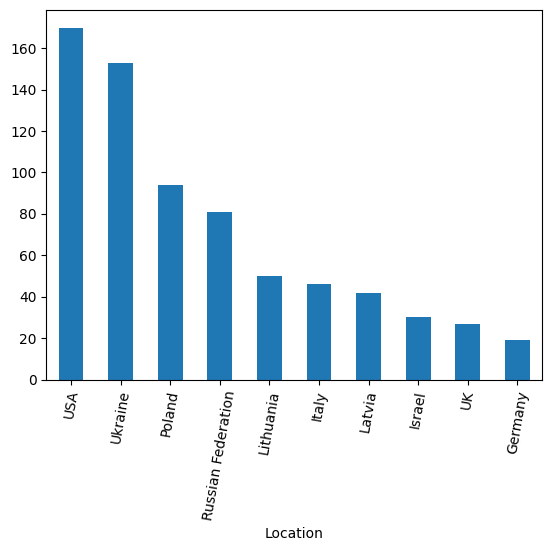

In [217]:
filtered_att['Location'].value_counts().head(n=10).plot.bar(rot=80) 

From this table we can see that the most attacks occured on the United States victims, followed by countries in Eastern Europe, which is explained by the ongoing war in that area. However, US has definitely been attacked the most often.

<Axes: xlabel='Industry'>

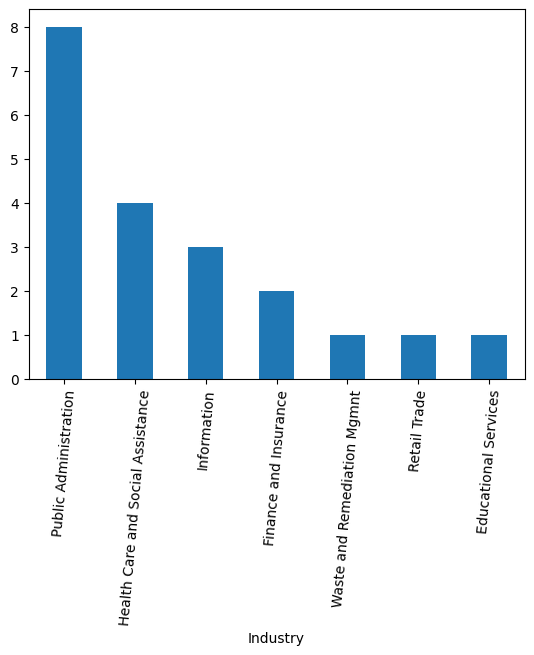

In [218]:
filtered_att['Industry'].head(n=20).value_counts().plot.bar(rot=85) 

As we can see, the Public Administration and Health Care industries have been targeted the most. This might be related to the fact that those industries contain numerous personal data, which might allow attackers to steal identities or disrupt the most significant services like healthcare.

In [219]:
filtered_att['Actor Location'].unique() 

array(['Ukraine', 'Russian Federation', 'Sudan', 'China',
       'Iran (Islamic Republic of)', 'Palestine, State of', 'India',
       'Italy', 'Afghanistan', 'Belarus', 'Turkey',
       "Korea (the Democratic People's Republic of)", 'Pakistan', 'Cuba',
       'Bangladesh', 'United States of America', 'Viet Nam', 'Thailand',
       'Malaysia'], dtype=object)

In [220]:
actor_loc_mapping = {
    'Iran (Islamic Republic of)': 'Iran',
    'Palestine, State of': 'Palestine',
    "Korea (the Democratic People's Republic of)": 'North Korea',
    'United States of America' : 'USA',
}

# Replace long location names with shorter versions for actor locations
filtered_att['Actor Location'] = filtered_att['Actor Location'].replace(actor_loc_mapping )

<Axes: xlabel='Actor Location'>

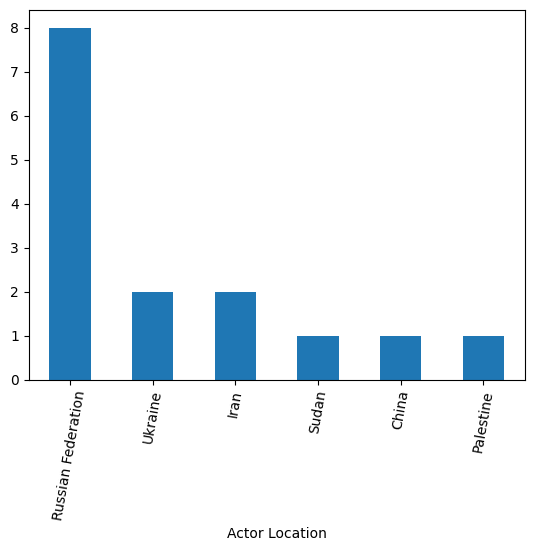

In [221]:
filtered_att['Actor Location'].head(n=15).value_counts().plot.bar(rot=80)

This graph clearly displays that the most recent attacks originated from the Russian Federation and Ukraine, followed by Iran.

In [222]:
filtered_att['Actor'].value_counts().head()

Actor
NoName057(16)         252
Killnet                89
ALPHVM                 89
People's CyberArmy     67
Clop                   48
Name: count, dtype: int64

<Axes: xlabel='Motive'>

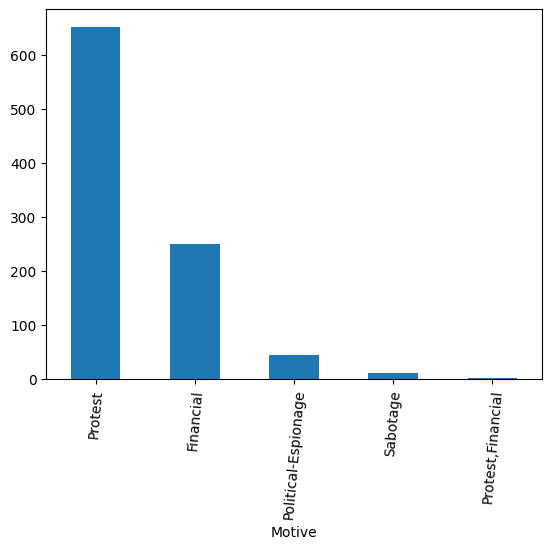

In [223]:
filtered_att['Motive'].value_counts().plot.bar(rot=85)

As we can see, one of the most prevalent motives were protests, followed by the financial. This is a common trend in most cyberattacks as actors go after financial benefit in most cases, trying to extort private data. The prevalence of the protest motives is explained by the political situation in the area.

<Axes: xlabel='Type'>

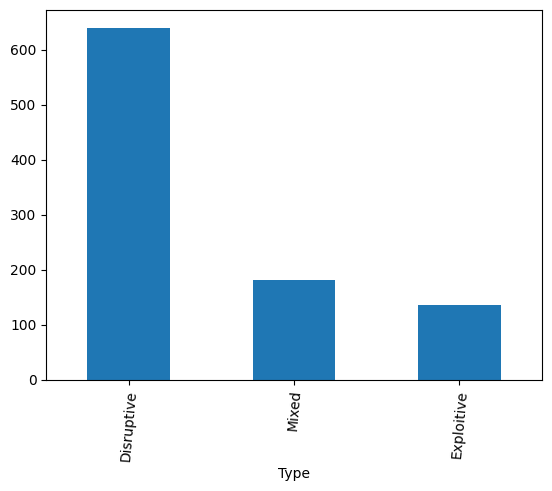

In [224]:
filtered_att['Type'].value_counts().plot.bar(rot=85)

The type of every cyberattack follows the primary motives of the attacker, so, as we identified the "Protest" motive as a leading factor, we can also observe that the "Disruptive" type of the attack follows the cause since attackers are trying to disrupt critical systems to change the geopolitical situation.

In [225]:
# Extract the years for the tidier data and our convenience
filtered_att['Year'] = pd.to_datetime(filtered_att['Date']).dt.year
filtered_att['Year'] = filtered_att['Year'].astype(int) 
filtered_att['Year']

3       2023
7       2023
8       2023
16      2023
17      2023
        ... 
4073    2022
4074    2022
4084    2022
4090    2022
4094    2022
Name: Year, Length: 957, dtype: int64

In [226]:
attack_cube = filtered_att.pivot_table(
    index="Location", columns=['Industry'],
    values='Year', aggfunc='count')                       
attack_cube 

Industry,Accommodation and Food Services,Agriculture,Arts and Entertainment,Construction,Educational Services,Enterprise Mgmnt,Finance and Insurance,Health Care and Social Assistance,Information,Manufacturing,"Mining, Oil, and Gas",Others,"Prof, Science, and Tech",Public Administration,Real Estate,Retail Trade,Transportation and Warehousing,Utilities,Waste and Remediation Mgmnt,Wholesale Trade
Location,,,,,,,,,,,,,,,,,,,,
Argentina,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
Belarus,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,2.0,1.0,3.0,3.0,2.0,NaN,26.0,2.0,28.0,12.0,NaN,3.0,NaN,40.0,NaN,1.0,10.0,11.0,1.0,8.0
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We create the data cube to display the industry that was attacked for each victim.<br>
The table contains several NaN values, so in the next steps we will create a new table that stores only the non-NaN industries as a list per each country for the further trend analysis.

In [228]:
industries_by_country = {}

# Iterate over the attack cube and find the industries per each country that are being attacked:
for country in attack_cube.index:
    industries = attack_cube.loc[country].dropna().index.tolist()
    industries_by_country[country] = industries

# Convert the dictionary to a DataFrame:
industries_table = pd.DataFrame(industries_by_country.items(), columns=['Country', 'Industries'])

display(industries_table)

,Country,Industries
0,Argentina,[Accommodation and Food Services]
1,Australia,"[Manufacturing, Prof, Science, and Tech, Publi..."
2,Austria,"[Public Administration, Transportation and War..."
3,Belarus,"[Educational Services, Public Administration]"
4,Belgium,"[Public Administration, Transportation and War..."
...,...,...
64,Ukraine,"[Accommodation and Food Services, Agriculture,..."
65,United Arab Emirates,[Finance and Insurance]
66,Venezuela (Bolivarian Republic of),[Finance and Insurance]
67,Viet Nam,[Finance and Insurance]


The output above allowed us to identify the industries per each victim country that helps us recognize if particular industries are attacked more frequently based on the country of the victim.

Now, I am going to create the table that stores the Industries list per each Country, so we can further identify the trends in the dataset. Using this table, we can further look up which industries were affected per each victim country.

In [229]:
pivot_att_locs = (filtered_att.
                   groupby('Location')['Actor Location'].
                   value_counts())
pivot_att_locs.to_frame()

count
Location                           Actor Location           
Argentina                          Russian Federation      1
Australia                          Russian Federation      5
                                   China                   2
                                   Iran                    2
Austria                            Russian Federation      2
...                                                      ...
Ukraine                            Sudan                   1
United Arab Emirates               North Korea             1
Venezuela (Bolivarian Republic of) Russian Federation      1
Viet Nam                           North Korea             1
Zambia                             Russian Federation      1

[115 rows x 1 columns]

In [230]:
# Group the data by victim Location and Actor Location (who attaks who)
vic_loc_attack_loc = filtered_att.groupby(['Location', 'Actor Location']).size().reset_index(name='count')

# Find the victim country with max count for each Actor Location using the count as indexing
max_count_att = vic_loc_attack_loc.loc[vic_loc_attack_loc.groupby('Actor Location')['count'].idxmax()]
print(max_count_att)

               Location      Actor Location  count
101                 USA         Afghanistan      4
37                India          Bangladesh      2
5               Belarus             Belarus      3
102                 USA               China     11
20                 Cuba                Cuba      1
39                India               India      2
49               Israel                Iran     12
53                Italy               Italy      3
40                India            Malaysia      2
103                 USA         North Korea      2
41                India            Pakistan      2
50               Israel           Palestine      1
104                 USA  Russian Federation    148
52               Israel               Sudan     14
96             Thailand            Thailand      1
24              Denmark              Turkey      1
16                China                 USA      1
83   Russian Federation             Ukraine     74
100                  UK        

In [231]:
who_attacks_usa = max_count_att[max_count_att['Location'] == 'USA']
print(who_attacks_usa)

    Location      Actor Location  count
101      USA         Afghanistan      4
102      USA               China     11
103      USA         North Korea      2
104      USA  Russian Federation    148


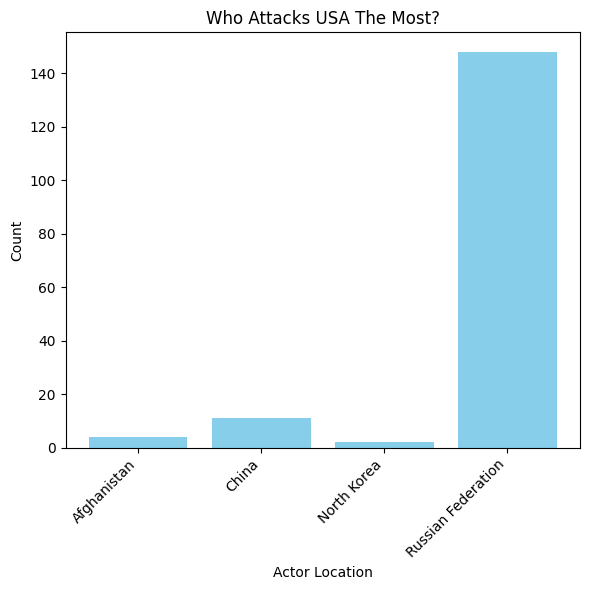

In [232]:
plt.figure(figsize=(6, 6))
plt.bar(who_attacks_usa['Actor Location'],who_attacks_usa['count'], color='skyblue')
plt.xlabel('Actor Location')
plt.ylabel('Count')
plt.title('Who Attacks USA The Most?')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [233]:
who_attacks_india = max_count_att[max_count_att['Location'] == 'India']
print(who_attacks_india)

   Location Actor Location  count
37    India     Bangladesh      2
39    India          India      2
40    India       Malaysia      2
41    India       Pakistan      2


# MODELING

In [235]:
filtered_df['Actor Type'].value_counts()

Actor Type
Hacktivist      291
Nation-State     95
Criminal         71
Hobbyist         19
Terrorist         6
Name: count, dtype: int64

In [236]:
filtered_df

,Name,Country,Actor Type,Last Seen,Year
44,@THTHerakles,Turkey,Hacktivist,2015-04-13,2015
51,A. S. A. L. A.,Armenia,Hacktivist,2015-11-11,2015
53,Abdellah Elmaghribi,United States of America,Hacktivist,2015-10-15,2015
54,Abdellah Elmaghribi; Moroccan Wolf,Turkmenistan,Hacktivist,2015-04-09,2015
56,Absa employee,South Africa,Criminal,2020-10-27,2020
...,...,...,...,...,...
1108,Z Company Hacking Crew,India,Hacktivist,2014-10-27,2014
1109,Zarya,Russian Federation,Hacktivist,2022-08-19,2022
1112,Zer0Pwn,Syrian Arab Republic,Hacktivist,2014-04-06,2014
1115,Zukr@in,Pakistan,Hacktivist,2014-10-09,2014


In [237]:
filtered_att

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type,Year
3,2023-10-30,Russian Federation,National Payment Card System (NSPK),Finance and Insurance,Ukraine,DumpForums and Ukrainian Cyber Alliance,Protest,Disruptive,Message Manipulation,2023
7,2023-10-30,UK,Manchester Airport,Public Administration,Russian Federation,UserSec,Protest,Disruptive,External Denial of Services,2023
8,2023-10-30,UK,Manchester Airport,Public Administration,Russian Federation,UserSec,Protest,Disruptive,External Denial of Services,2023
16,2023-10-27,Russian Federation,"Three Russian internet providers, Miranda-medi...",Information,Ukraine,Ukrainian IT Army,Protest,Disruptive,External Denial of Services,2023
17,2023-10-27,Sweden,Spotify,Information,Sudan,Anonymous Sudan,Protest,Disruptive,External Denial of Services,2023
...,...,...,...,...,...,...,...,...,...,...
4073,2022-04-05,Russian Federation,EGAIS,Public Administration,Ukraine,Ukraine IT Army,Protest,Disruptive,External Denial of Service,2022
4074,2022-04-05,Portugal,Sonae,Retail Trade,Russian Federation,GOLD DUPONT,Financial,Mixed,Data Attack,2022
4084,2022-04-02,Germany,Nordex,Manufacturing,Russian Federation,WIZARD SPIDER,Financial,Disruptive,Data Attack,2022
4090,2022-04-01,USA,Metagenics,Manufacturing,Russian Federation,Cuba,Financial,Mixed,Data Attack,2022


In [292]:
def find_best_knn_model(models_list):
    # Search for the model with the highest accuracy
    best_acc = 0
    best_k_for_acc = None

    for k, l in models_list.items():
        accuracy = l["Accuracy Test"] # grab each accuracy score
        if accuracy > best_acc:
            best_acc = accuracy
            best_k_for_acc = k

    best_f1_for_S = 0
    best_k_for_f1 = None

    for k, l in models_list.items():
        f1_each = l["f1 Test"] # grab each accuracy score
        if f1_each > best_f1_for_S:
            best_f1_for_S = f1_each
            best_k_for_f1 = k

    # Display the best k value and its corresponding model
    #print(f"Best k value: {best_k_for_acc}, with accuracy: {best_acc}.")
    #print(f"Best k value: {best_k_for_f1}, with F1 for S: {best_f1_for_S}.")
    
    return {"Model": "KNN", "Accuracy Test": best_acc, "f1 Test": best_f1_for_S}

In [293]:
def train_knn_models(features, label_string, train_set, test_set):

    train_filtered = train_set[features + [label_string]].dropna() # make sure to drop the instances where either a feature or the label is NaN
    dropped_index = train_set.index.difference(train_filtered.index) # find the index of the dropped sample from the features

    X_train = train_filtered[features].to_dict(orient="records") # train set 
    y_train = train_set[label_string] 
    y_train_filtered = y_train.drop(dropped_index)

    test_filtered = test_set[features + [label_string]].dropna()
    dropped_index2 = test_set.index.difference(test_filtered.index)

    X_test = test_filtered[features].to_dict(orient="records") # test set 
    y_test = test_set[label_string] 
    y_test_filtered = y_test.drop(dropped_index2)

    # vectorize the training set:
    vec = DictVectorizer(sparse=False)
    vec.fit(X_train)
    X_train_tr3 = vec.transform(X_train)
    X_test_tr3= vec.transform(X_test)

    # standardize the data
    scaler = StandardScaler()
    scaler.fit(X_train_tr3)
    X_train_sc3 = scaler.transform(X_train_tr3)
    X_test_sc3 = scaler.transform(X_test_tr3) # only transform the test data


    knn_models = {}

    for k in range(1, 100):
        model_each = KNeighborsClassifier(n_neighbors=k)
        model_each.fit(X_train_sc3, y_train_filtered)

        #y_pred_each2 = model_each2.predict(X_train_sc2) # for the train
        y_test_pred_each = model_each.predict(X_test_sc3)

        #accuracy2_train = accuracy_score(y_train_rev, y_pred_each2) # for the train
        accuracy_test = accuracy_score(y_test_filtered, y_test_pred_each)

        #f12_tr = f1_score(y_train_rev, y_pred_each2, average=None) # for the train
        #f1_for_S2_tr = f12_tr[0] 

        f1_test = f1_score(y_test_filtered, y_test_pred_each, average=None)
        f1_for_S_test = f1_test[0] 

        knn_models [k] = {"k": k, "Accuracy Test": accuracy_test,  "f1 Test" : f1_for_S_test} 
    
    return knn_models

In [294]:
def train_svm_model(features, label_string, train_set, test_set):
    train_filtered = train_set[features + [label_string]].dropna()
    dropped_index = train_set.index.difference(train_filtered.index)

    X_train = train_filtered[features].to_dict(orient="records")
    y_train = train_set[label_string]
    y_train_filtered = y_train.drop(dropped_index)

    test_filtered = test_set[features + [label_string]].dropna()
    dropped_index2 = test_set.index.difference(test_filtered.index)

    X_test = test_filtered[features].to_dict(orient="records")
    y_test = test_set[label_string]
    y_test_filtered = y_test.drop(dropped_index2)

    vec = DictVectorizer(sparse=False)
    vec.fit(X_train)
    X_train_tr = vec.transform(X_train)
    X_test_tr = vec.transform(X_test)

    scaler = StandardScaler()
    scaler.fit(X_train_tr)
    X_train_sc = scaler.transform(X_train_tr)
    X_test_sc = scaler.transform(X_test_tr)

    svm_model = SVC() # Try Support Vector Machine Classifier 
    svm_model.fit(X_train_sc, y_train_filtered)

    y_test_pred = svm_model.predict(X_test_sc)
    accuracy_test = accuracy_score(y_test_filtered, y_test_pred)
    f1_test = f1_score(y_test_filtered, y_test_pred, average=None)[0]

    return {"Model": "SVM", "Accuracy Test": accuracy_test, "f1 Test": f1_test}


In [299]:
def train_decision_tree_model(features, label_string, train_set, test_set):
    train_filtered = train_set[features + [label_string]].dropna()
    dropped_index = train_set.index.difference(train_filtered.index)

    X_train = train_filtered[features].to_dict(orient="records")
    y_train = train_set[label_string]
    y_train_filtered = y_train.drop(dropped_index)

    test_filtered = test_set[features + [label_string]].dropna()
    dropped_index2 = test_set.index.difference(test_filtered.index)

    X_test = test_filtered[features].to_dict(orient="records")
    y_test = test_set[label_string]
    y_test_filtered = y_test.drop(dropped_index2)

    vec = DictVectorizer(sparse=False)
    vec.fit(X_train)
    X_train_tr = vec.transform(X_train)
    X_test_tr = vec.transform(X_test)

    dt_model = DecisionTreeClassifier() # Try Decision Tree Classifier
    dt_model.fit(X_train_tr, y_train_filtered)

    y_test_pred = dt_model.predict(X_test_tr)

    accuracy_test = accuracy_score(y_test_filtered, y_test_pred) # calculate scores on the test (validation) sets
    f1_test = f1_score(y_test_filtered, y_test_pred, average=None)[0]

    return {"Model": "DT", "Accuracy Test": accuracy_test, "f1 Test": f1_test}

In [300]:
# Split the dataset into the train and test set using fraction .8 (according to the regular train/test ratio 80:20)

# Threat Actors dataset:
train_set_thr = filtered_df.sample(frac=.8)
test_set_thr = filtered_df.drop(train_set_thr.index)

# Attack List dataset:
train_set_att = filtered_att.sample(frac=.8)
test_set_att = filtered_att.drop(train_set_att.index)


## Experiment 1

In [301]:
# Use the name, country of the attacker features to predict the actor type
# < Threat Actors > dataset
features2 = ["Name", "Country"] 
label_string2 = "Actor Type"

results_svm2 = train_svm_model(features2, label_string2, train_set_thr, test_set_thr) # SVC
results_knn2 = train_knn_models(features2, label_string2, train_set_thr, test_set_thr) # KNN
results_tree2 = train_decision_tree_model(features2, label_string2, train_set_thr, test_set_thr) # DT
best_knn2 = find_best_knn_model(results_knn2)

In [302]:
results2 = pd.DataFrame([best_knn2, results_svm2, results_tree2])
print(results2)

  Model  Accuracy Test   f1 Test
0   KNN       0.708333  0.272727
1   SVM       0.718750  0.000000
2    DT       0.666667  0.210526


## Experiment 2

In [303]:
# Use victim's location and industry to predict the actors' motives.
# < AttackList > dataset
features3 = ["Location", "Industry"]
label_string3 = "Motive"


results_knn3 = train_knn_models(features3, label_string3, train_set_att, test_set_att) # KNN
results_svm3 = train_svm_model(features3, label_string3, train_set_att, test_set_att) # SVC
results_tree3 = train_decision_tree_model(features3, label_string3, train_set_att, test_set_att) # DT
best_knn3 = find_best_knn_model(results_knn3)

In [304]:
results3 = pd.DataFrame([best_knn3, results_svm3, results_tree3])
print(results3)

  Model  Accuracy Test   f1 Test
0   KNN       0.789474  0.756757
1   SVM       0.794737  0.714286
2    DT       0.800000  0.715789


## Experiment 3

In [306]:
# Use victim's location and industry, as well as the type of the attack to predict the actors' motives.
# < AttackList > dataset

features4 = ["Location", "Industry", "Type"]
label_string4 = "Motive"

results_knn4 = train_knn_models(features4, label_string4, train_set_att, test_set_att) # KNN
results_svm4 = train_svm_model(features4, label_string4, train_set_att, test_set_att) # SVC
results_tree4 = train_decision_tree_model(features4, label_string4, train_set_att, test_set_att) # DT
best_knn4 = find_best_knn_model(results_knn4)

In [307]:
results4 = pd.DataFrame([best_knn4, results_svm4, results_tree4])
print(results4)

  Model  Accuracy Test   f1 Test
0   KNN       0.878947  0.849057
1   SVM       0.889474  0.864865
2    DT       0.931579  0.917431


## Experiment 4

In [308]:
# Use victim's location and industry, as well as the attacker's motive to predict the actors' type
# < AttackList > dataset

features5 = ["Location", "Industry", "Motive"]
label_string5 = "Type"

results_knn5 = train_knn_models(features5, label_string5, train_set_att, test_set_att) # KNN
results_svm5 = train_svm_model(features5, label_string5, train_set_att, test_set_att) # SVC
results_tree5 = train_decision_tree_model(features5, label_string5, train_set_att, test_set_att) # DT
best_knn5 = find_best_knn_model(results_knn5)

In [309]:
results5 = pd.DataFrame([best_knn5, results_svm5, results_tree5])
print(results5)

  Model  Accuracy Test   f1 Test
0   KNN       0.826316  0.915385
1   SVM       0.852632  0.928000
2    DT       0.894737  0.951220


# Correlation between Categorical Features

## Experiment 1

In [348]:
# Create the counts table for the Actor's Country and Type
counts_df = pd.crosstab(filtered_df["Country"], filtered_df["Actor Type"])
counts_norm1 = pd.crosstab(filtered_df["Country"], filtered_df["Actor Type"], normalize=True)
counts_df

Actor Type,Criminal,Hacktivist,Hobbyist,Nation-State,Terrorist
Country,,,,,
Afghanistan,0,0,1,3,0
Albania,0,1,0,0,0
Algeria,0,1,0,0,0
Armenia,0,1,0,0,0
Australia,1,1,0,0,0
...,...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland,3,6,0,1,0
United States of America,15,45,5,4,0
Uzbekistan,0,0,0,1,0


In [337]:
# Find the marginal probabilities for the Actor Type 
actor_type_marg = counts_norm1.sum(axis=0)
actor_type_marg

Actor Type
Criminal        0.147303
Hacktivist      0.603734
Hobbyist        0.039419
Nation-State    0.197095
Terrorist       0.012448
dtype: float64

In [349]:
# Given the actor type, the distribution of the actor's country
type_given_country = counts_norm1.divide(actor_type_marg, axis=1)
type_given_country

Actor Type,Criminal,Hacktivist,Hobbyist,Nation-State,Terrorist
Country,,,,,
Afghanistan,0.000000,0.000000,0.052632,0.031579,0.0
Albania,0.000000,0.003436,0.000000,0.000000,0.0
Algeria,0.000000,0.003436,0.000000,0.000000,0.0
Armenia,0.000000,0.003436,0.000000,0.000000,0.0
Australia,0.014085,0.003436,0.000000,0.000000,0.0
...,...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland,0.042254,0.020619,0.000000,0.010526,0.0
United States of America,0.211268,0.154639,0.263158,0.042105,0.0
Uzbekistan,0.000000,0.000000,0.000000,0.010526,0.0


<Axes: xlabel='Actor Type', ylabel='Country'>

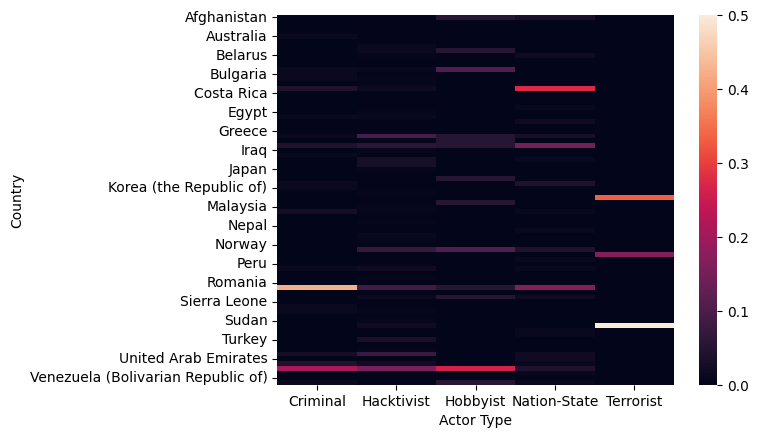

In [350]:
sns.heatmap(type_given_country) # Actor Type v Country

In [351]:
# Prepare the marginal distributions, joint probability, and the outer product for the independence
actors_all = counts_df.sum().sum() # total number of actors
types_marg = counts_df.sum(axis=0) / actors_all # The marginal distribution of actor type by summing over the country
country_marg = counts_df.sum(axis=1) / actors_all # The marginal distribution of actor country by summing over the actor type
expected1 = np.outer(country_marg, types_marg) # assuming independence

In [388]:
# Total Variation Distance:
tot_var_dist1 = (counts_norm1 - expected1).abs().sum().sum()

# Chi-Square Distance: 
chi_sq_1 = (((counts_norm1 - expected1) ** 2) / expected1).sum().sum()

# Mutual Information;
mut_info1 = (counts_norm1 * np.log(counts_norm1 / expected1)).sum().sum() # mutual information

# The correlation table:
results1_corr = pd.DataFrame()
results1_corr.insert(loc=0, column="Correlation", value=["Tot.Var.Dist", "Chi-Square", "Mut.Info"])
results1_corr.insert(loc=1, column="Value", value=[tot_var_dist1, chi_sq_1, mut_info1])
print("Actor's Country & Actor's Type")
print(results1_corr)

Actor's Country & Actor's Type
    Correlation     Value
0  Tot.Var.Dist  0.620194
1    Chi-Square  1.292809
2      Mut.Info  0.394576


# Experiment 2

In [358]:
# Create the counts table for the victim's Location and Industry
counts_att1 = pd.crosstab(filtered_att["Location"], filtered_att["Industry"])
counts_norm2 = pd.crosstab(filtered_att["Location"], filtered_att["Industry"], normalize=True)
counts_att1

Industry,Accommodation and Food Services,Agriculture,Arts and Entertainment,Construction,Educational Services,Enterprise Mgmnt,Finance and Insurance,Health Care and Social Assistance,Information,Manufacturing,"Mining, Oil, and Gas",Others,"Prof, Science, and Tech",Public Administration,Real Estate,Retail Trade,Transportation and Warehousing,Utilities,Waste and Remediation Mgmnt,Wholesale Trade
Location,,,,,,,,,,,,,,,,,,,,
Argentina,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,1,0,0,4,1,2,0,1,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
Belarus,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,2,1,3,3,2,0,26,2,28,12,0,3,0,40,0,1,10,11,1,8
United Arab Emirates,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Venezuela (Bolivarian Republic of),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [360]:
# Find the marginal probabilities for the victim's industry 
industry_marg = counts_norm2.sum(axis=0)
industry_marg

Industry
Accommodation and Food Services      0.010471
Agriculture                          0.002094
Arts and Entertainment               0.012565
Construction                         0.006283
Educational Services                 0.065969
Enterprise Mgmnt                     0.002094
Finance and Insurance                0.113089
Health Care and Social Assistance    0.053403
Information                          0.075393
Manufacturing                        0.079581
Mining, Oil, and Gas                 0.003141
Others                               0.017801
Prof, Science, and Tech              0.048168
Public Administration                0.275393
Real Estate                          0.007330
Retail Trade                         0.010471
Transportation and Warehousing       0.126702
Utilities                            0.054450
Waste and Remediation Mgmnt          0.020942
Wholesale Trade                      0.014660
dtype: float64

In [362]:
# Given the victim's industry, the distribution of the victim's location
loc_given_industry = counts_norm2.divide(industry_marg, axis=1)
loc_given_industry

Industry,Accommodation and Food Services,Agriculture,Arts and Entertainment,Construction,Educational Services,Enterprise Mgmnt,Finance and Insurance,Health Care and Social Assistance,Information,Manufacturing,"Mining, Oil, and Gas",Others,"Prof, Science, and Tech",Public Administration,Real Estate,Retail Trade,Transportation and Warehousing,Utilities,Waste and Remediation Mgmnt,Wholesale Trade
Location,,,,,,,,,,,,,,,,,,,,
Argentina,0.1,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
Australia,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.013158,0.0,0.000000,0.086957,0.003802,0.285714,0.0,0.008264,0.000000,0.00,0.000000
Austria,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.003802,0.000000,0.0,0.008264,0.000000,0.00,0.000000
Belarus,0.0,0.0,0.00,0.0,0.015873,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.011407,0.000000,0.0,0.000000,0.000000,0.00,0.000000
Belgium,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.011407,0.000000,0.0,0.008264,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.2,0.5,0.25,0.5,0.031746,0.0,0.240741,0.039216,0.388889,0.157895,0.0,0.176471,0.000000,0.152091,0.000000,0.1,0.082645,0.211538,0.05,0.571429
United Arab Emirates,0.0,0.0,0.00,0.0,0.000000,0.0,0.009259,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
Venezuela (Bolivarian Republic of),0.0,0.0,0.00,0.0,0.000000,0.0,0.009259,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000


<Axes: xlabel='Industry', ylabel='Location'>

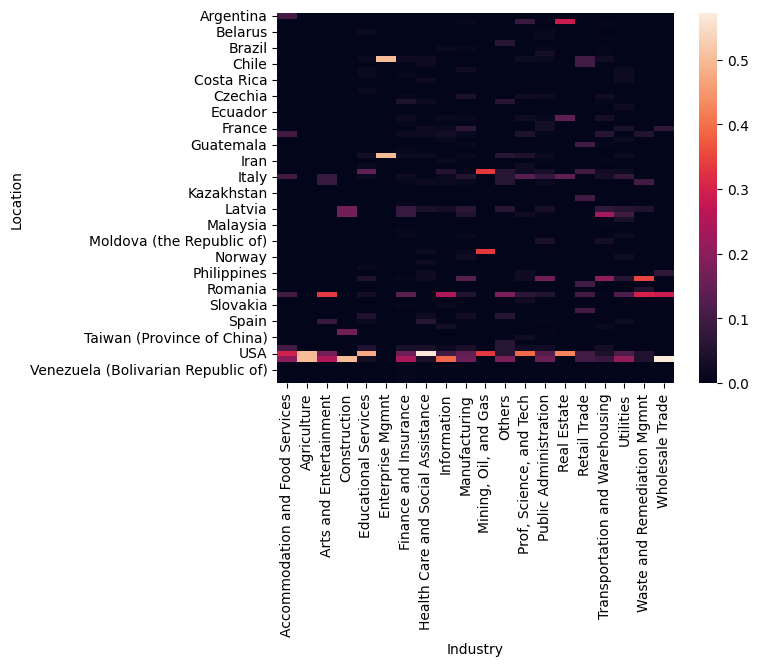

In [363]:
sns.heatmap(loc_given_industry) # Location v Industry (of the victims)

In [364]:
# Prepare the marginal distributions, joint probability, and the outer product for the independence
attacks_all = counts_att1.sum().sum() # total number of attacks
industry_marg = counts_att1.sum(axis=0) / attacks_all # The marginal distribution of victim's industry by summing over the country
victim_country_marg = counts_att1.sum(axis=1) / attacks_all # The marginal distribution of victim's country by summing over the industry
expected2 = np.outer(victim_country_marg, industry_marg) # assuming independence

In [387]:
# Total Variation Distance:
tot_var_dist2 = (counts_norm2 - expected2).abs().sum().sum()

# Chi-Square Distance: 
chi_sq_2 = (((counts_norm2 - expected2) ** 2) / expected2).sum().sum()

# Mutual Information;
mut_info2 = (counts_norm2 * np.log(counts_norm2 / expected2)).sum().sum() # mutual information

# The correlation table:
results2_corr = pd.DataFrame()
results2_corr.insert(loc=0, column="Correlation", value=["Tot.Var.Dist", "Chi-Square", "Mut.Info"])
results2_corr.insert(loc=1, column="Value", value=[tot_var_dist2, chi_sq_2, mut_info2])
print("Victim Location & Victim's Industry")
print(results2_corr)

Victim Location & Victim's Industry
    Correlation     Value
0  Tot.Var.Dist  0.790130
1    Chi-Square  2.132405
2      Mut.Info  0.592248


# Experiment 3

In [366]:
# Create the counts table for the victim's Location and actor's Location
counts_att2 = pd.crosstab(filtered_att["Location"], filtered_att["Actor Location"])
counts_norm3 = pd.crosstab(filtered_att["Location"], filtered_att["Actor Location"], normalize=True)
counts_att2

Actor Location,Afghanistan,Bangladesh,Belarus,China,Cuba,India,Iran,Italy,Malaysia,North Korea,Pakistan,Palestine,Russian Federation,Sudan,Thailand,Turkey,USA,Ukraine,Viet Nam
Location,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Australia,0,0,0,2,0,0,2,0,0,0,0,0,5,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Belarus,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Belgium,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0,0,1,0,0,0,0,0,0,0,0,0,141,1,0,0,0,10,0
United Arab Emirates,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Venezuela (Bolivarian Republic of),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [367]:
# Find the marginal probabilities for the actor's location
actor_loc = counts_norm3.sum(axis=0)
actor_loc

Actor Location
Afghanistan           0.013584
Bangladesh            0.002090
Belarus               0.004180
China                 0.027168
Cuba                  0.001045
India                 0.003135
Iran                  0.018809
Italy                 0.003135
Malaysia              0.002090
North Korea           0.005225
Pakistan              0.002090
Palestine             0.001045
Russian Federation    0.787879
Sudan                 0.025078
Thailand              0.001045
Turkey                0.002090
USA                   0.001045
Ukraine               0.098224
Viet Nam              0.001045
dtype: float64

In [372]:
# Given the actor's location, the distribution of the victim's location
vic_loc_given_act_loc = counts_norm3.divide(actor_loc, axis=1)
vic_loc_given_act_loc

Actor Location,Afghanistan,Bangladesh,Belarus,China,Cuba,India,Iran,Italy,Malaysia,North Korea,Pakistan,Palestine,Russian Federation,Sudan,Thailand,Turkey,USA,Ukraine,Viet Nam
Location,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001326,0.000000,0.0,0.0,0.0,0.000000,0.0
Australia,0.0,0.0,0.00,0.076923,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.006631,0.000000,0.0,0.0,0.0,0.000000,0.0
Austria,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.002653,0.000000,0.0,0.0,0.0,0.000000,0.0
Belarus,0.0,0.0,0.75,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010638,0.0
Belgium,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.005305,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.187003,0.041667,0.0,0.0,0.0,0.106383,0.0
United Arab Emirates,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Venezuela (Bolivarian Republic of),0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001326,0.000000,0.0,0.0,0.0,0.000000,0.0


<Axes: xlabel='Actor Location', ylabel='Location'>

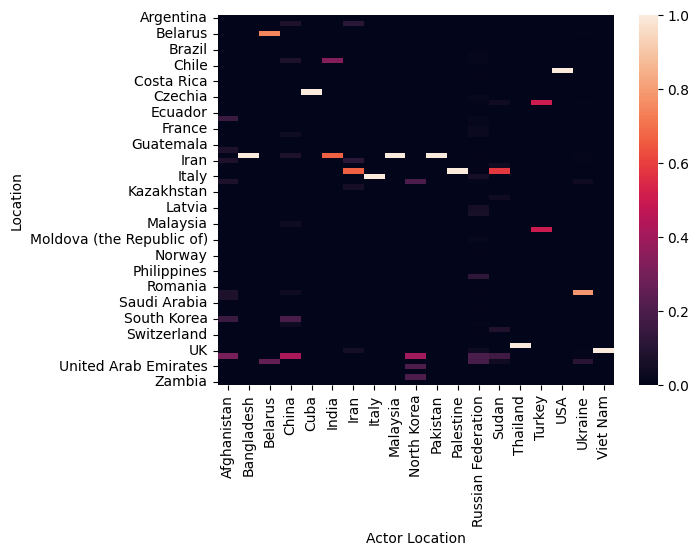

In [373]:
sns.heatmap(vic_loc_given_act_loc) # Actor's Location v Victim's Location

In [375]:
# Prepare the marginal distributions, joint probability, and the outer product for the independence
attacks_all2 = counts_att2.sum().sum() # total number of attacks
actor_marg = counts_att2.sum(axis=0) / attacks_all2 # The marginal distribution of actor's location by summing over the victim's country
victim_loc_marg = counts_att2.sum(axis=1) / attacks_all2 # The marginal distribution of victim's country by summing over the actor's location
expected3 = np.outer(victim_loc_marg, actor_marg) # assuming independence

In [386]:
# Total Variation Distance:
tot_var_dist3 = (counts_norm3 - expected3).abs().sum().sum()

# Chi-Square Distance: 
chi_sq_3 = (((counts_norm3 - expected3) ** 2) / expected3).sum().sum()

# Mutual Information;
mut_info3 = (counts_norm3 * np.log(counts_norm3 / expected3)).sum().sum() # mutual information

# The correlation table:
results3_corr = pd.DataFrame()
results3_corr.insert(loc=0, column="Correlation", value=["Tot.Var.Dist", "Chi-Square", "Mut.Info"])
results3_corr.insert(loc=1, column="Value", value=[tot_var_dist3, chi_sq_3, mut_info3])
print("Victim Location & Actor's Location")
print(results3_corr)

Victim Location & Actor's Location
    Correlation     Value
0  Tot.Var.Dist  0.571103
1    Chi-Square  6.368058
2      Mut.Info  0.569270


# Experiment 4

In [378]:
# Create the counts table for the victim's Location and actor's motive
counts_att3 = pd.crosstab(filtered_att["Location"], filtered_att["Motive"])
counts_norm4 = pd.crosstab(filtered_att["Location"], filtered_att["Motive"], normalize=True)
counts_att3

Motive,Financial,Political-Espionage,Protest,"Protest,Financial",Sabotage
Location,,,,,
Argentina,1,0,0,0,0
Australia,5,3,0,0,1
Austria,1,0,1,0,0
Belarus,0,0,4,0,0
Belgium,0,0,4,0,0
...,...,...,...,...,...
Ukraine,1,20,126,0,6
United Arab Emirates,1,0,0,0,0
Venezuela (Bolivarian Republic of),1,0,0,0,0


In [379]:
# Find the marginal probabilities for the actor's motive
actor_motive = counts_norm4.sum(axis=0)
actor_motive

Motive
Financial              0.261233
Political-Espionage    0.045977
Protest                0.681296
Protest,Financial      0.001045
Sabotage               0.010449
dtype: float64

In [380]:
# Given the actor's motive, the distribution of the victim's location
vic_loc_given_act_loc = counts_norm4.divide(actor_motive, axis=1)
vic_loc_given_act_loc

Motive,Financial,Political-Espionage,Protest,"Protest,Financial",Sabotage
Location,,,,,
Argentina,0.004,0.000000,0.000000,0.0,0.0
Australia,0.020,0.068182,0.000000,0.0,0.1
Austria,0.004,0.000000,0.001534,0.0,0.0
Belarus,0.000,0.000000,0.006135,0.0,0.0
Belgium,0.000,0.000000,0.006135,0.0,0.0
...,...,...,...,...,...
Ukraine,0.004,0.454545,0.193252,0.0,0.6
United Arab Emirates,0.004,0.000000,0.000000,0.0,0.0
Venezuela (Bolivarian Republic of),0.004,0.000000,0.000000,0.0,0.0


<Axes: xlabel='Motive', ylabel='Location'>

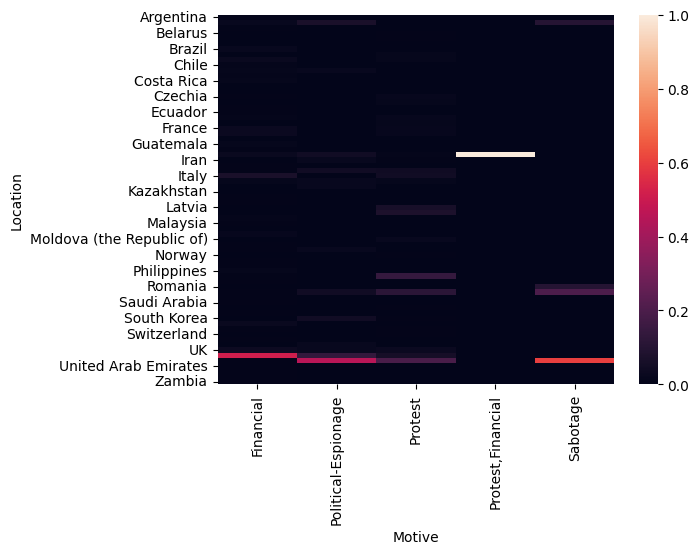

In [381]:
sns.heatmap(vic_loc_given_act_loc) # Actor's Motive v Victim's Location

In [382]:
# Prepare the marginal distributions, joint probability, and the outer product for the independence
attacks_all3 = counts_att3.sum().sum() # total number of attacks
motive_marg = counts_att3.sum(axis=0) / attacks_all3 # The marginal distribution of actor's motive by summing over the victim country
victim_loc_marg = counts_att3.sum(axis=1) / attacks_all3 # The marginal distribution of victim's country by summing over the actor's motive
expected4 = np.outer(victim_loc_marg, motive_marg) # assuming independence

In [385]:
# Total Variation Distance:
tot_var_dist4 = (counts_norm4 - expected4).abs().sum().sum()

# Chi-Square Distance: 
chi_sq_4 = (((counts_norm4 - expected4) ** 2) / expected4).sum().sum()

# Mutual Information;
mut_info4 = (counts_norm4 * np.log(counts_norm4 / expected4)).sum().sum() # mutual information

# The correlation table:
results4_corr = pd.DataFrame()
results4_corr.insert(loc=0, column="Correlation", value=["Tot.Var.Dist", "Chi-Square", "Mut.Info"])
results4_corr.insert(loc=1, column="Value", value=[tot_var_dist4, chi_sq_4, mut_info4])
print("Victim Location & Actor's Motive")
print(results4_corr)

Victim Location & Actor's Motive
    Correlation     Value
0  Tot.Var.Dist  0.639957
1    Chi-Square  0.847925
2      Mut.Info  0.390077


# Experiment 5

In [389]:
# Create the counts table for the actor's motive and actor's type
counts_att4 = pd.crosstab(filtered_att["Motive"], filtered_att["Type"])
counts_norm5 = pd.crosstab(filtered_att["Motive"], filtered_att["Type"], normalize=True)
counts_att4

Type,Disruptive,Exploitive,Mixed
Motive,,,
Financial,21,69,160
Political-Espionage,0,32,12
Protest,612,34,6
"Protest,Financial",0,0,1
Sabotage,7,1,2


In [390]:
# Find the marginal probabilities for the actor's type
actor_type2 = counts_norm5.sum(axis=0)
actor_type2

Type
Disruptive    0.668757
Exploitive    0.142111
Mixed         0.189133
dtype: float64

In [391]:
# Given the actor's type, the distribution of the victim's motive
motive_given_type = counts_norm5.divide(actor_type2, axis=1)
motive_given_type

Type,Disruptive,Exploitive,Mixed
Motive,,,
Financial,0.032813,0.507353,0.883978
Political-Espionage,0.000000,0.235294,0.066298
Protest,0.956250,0.250000,0.033149
"Protest,Financial",0.000000,0.000000,0.005525
Sabotage,0.010938,0.007353,0.011050


<Axes: xlabel='Type', ylabel='Motive'>

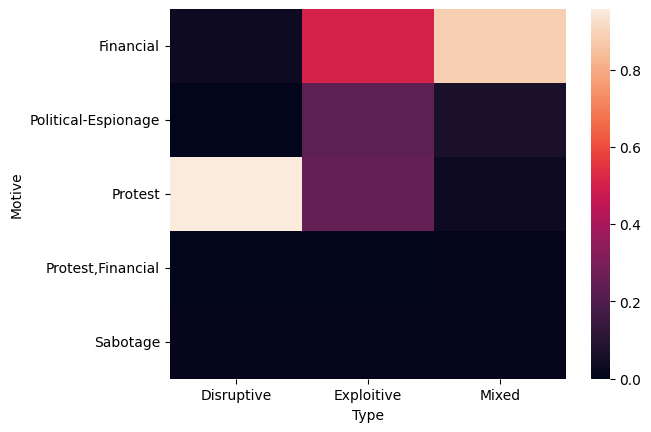

In [392]:
sns.heatmap(motive_given_type) # Actor's Motive v Actor's Type

In [393]:
# Prepare the marginal distributions, joint probability, and the outer product for the independence
attacks_all4 = counts_att4.sum().sum() # total number of attacks
actor_type_marg = counts_att4.sum(axis=0) / attacks_all2 # The marginal distribution of actor's type by summing over the actor's type
motive_marg = counts_att4.sum(axis=1) / attacks_all2 # The marginal distribution of actor's type by summing over the actor's motive
expected5 = np.outer(motive_marg, actor_type_marg) # assuming independence

In [403]:
# Total Variation Distance:
tot_var_dist5 = (counts_norm5 - expected5).abs().sum().sum()

# Chi-Square Distance: 
chi_sq_5 = (((counts_norm5 - expected5) ** 2) / expected5).sum().sum()

# Mutual Information;
mut_info5 = (counts_norm5 * np.log(counts_norm5 / expected5)).sum().sum() # mutual information

# The correlation table:
results5_corr = pd.DataFrame()
results5_corr.insert(loc=0, column="Correlation", value=["Tot.Var.Dist", "Chi-Square", "Mut.Info"])
results5_corr.insert(loc=1, column="Value", value=[tot_var_dist5, chi_sq_5, mut_info5])
print("Actor's Motive & Actor's Type")
print(results5_corr)

Actor's Motive & Actor's Type
    Correlation     Value
0  Tot.Var.Dist  0.737340
1    Chi-Square  0.824788
2      Mut.Info  0.429383


# Experiment 6

In [397]:
# Create the counts table for the actor's Type and Sub-Type
counts_att5 = pd.crosstab(filtered_att["Type"], filtered_att["Sub-Type"])
counts_norm6 = pd.crosstab(filtered_att["Type"], filtered_att["Sub-Type"], normalize=True)
counts_att5

Sub-Type,Data Attack,"Data Attack,Exploitation of Application Server",Exploitation of Application Server,Exploitation of End Host,Exploitation of End Hosts,Exploitation of End User,Exploitation of Network Infrastructure,Exploitation of Sensor,Exploitation of Sensors,External Denial of Service,External Denial of Services,Internal Denial of Service,Message Manipulation,Physical Attack,Unknown
Type,,,,,,,,,,,,,,,
Disruptive,22,0,0,0,0,0,0,0,0,121,463,1,27,6,0
Exploitive,0,0,96,20,2,1,4,3,4,1,2,0,0,0,1
Mixed,147,21,10,0,0,0,0,0,0,1,2,0,0,0,0


In [400]:
# Find the marginal probabilities for the actor's type
actor_type3 = counts_norm6.sum(axis=1)
actor_type3

Type
Disruptive    0.670157
Exploitive    0.140314
Mixed         0.189529
dtype: float64

In [401]:
# Given the actor's type, the distribution of the actor's sub-type
sub_type_given_type = counts_norm6.divide(actor_type3, axis=0)
sub_type_given_type 

Sub-Type,Data Attack,"Data Attack,Exploitation of Application Server",Exploitation of Application Server,Exploitation of End Host,Exploitation of End Hosts,Exploitation of End User,Exploitation of Network Infrastructure,Exploitation of Sensor,Exploitation of Sensors,External Denial of Service,External Denial of Services,Internal Denial of Service,Message Manipulation,Physical Attack,Unknown
Type,,,,,,,,,,,,,,,
Disruptive,0.034375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189062,0.723437,0.001563,0.042188,0.009375,0.000000
Exploitive,0.000000,0.000000,0.716418,0.149254,0.014925,0.007463,0.029851,0.022388,0.029851,0.007463,0.014925,0.000000,0.000000,0.000000,0.007463
Mixed,0.812155,0.116022,0.055249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.011050,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Sub-Type', ylabel='Type'>

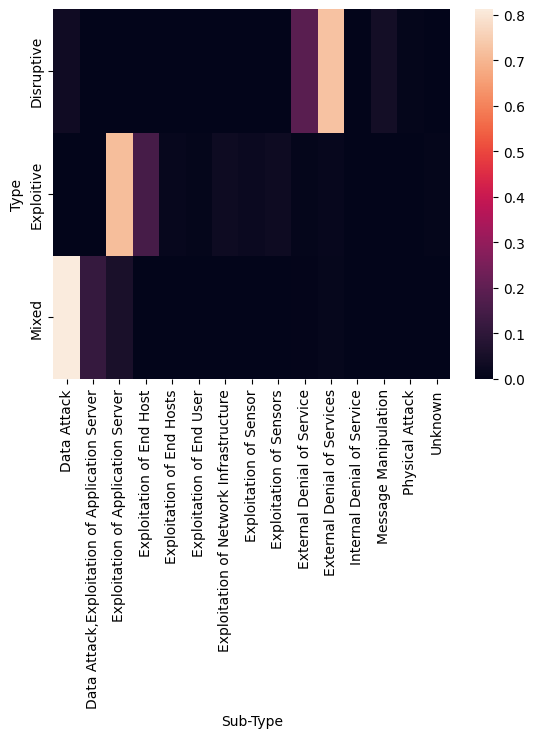

In [402]:
sns.heatmap(sub_type_given_type ) # Actor's Type v Actor's Sub-Type

In [405]:
# Prepare the marginal distributions, joint probability, and the outer product for the independence
attacks_all4 = counts_att5.sum().sum() # total number of attacks
sub_type_n = counts_att5.sum(axis=0) / attacks_all4 # The marginal distribution of actor's sub-type by summing over the actor's type
actor_type_n= counts_att5.sum(axis=1) / attacks_all4 # The marginal distribution of actor's type by summing over the actor's sub-type
expected6 = np.outer(actor_type_n, sub_type_n) # assuming independence

In [406]:
# Total Variation Distance:
tot_var_dist6 = (counts_norm6 - expected6).abs().sum().sum()

# Chi-Square Distance: 
chi_sq_6 = (((counts_norm6 - expected6) ** 2) / expected6).sum().sum()

# Mutual Information;
mut_info6 = (counts_norm6 * np.log(counts_norm6 / expected6)).sum().sum() # mutual information

# The correlation table:
results6_corr = pd.DataFrame()
results6_corr.insert(loc=0, column="Correlation", value=["Tot.Var.Dist", "Chi-Square", "Mut.Info"])
results6_corr.insert(loc=1, column="Value", value=[tot_var_dist6, chi_sq_6, mut_info6])
print("Victim Location & Actor's Location")
print(results6_corr)

Victim Location & Actor's Location
    Correlation     Value
0  Tot.Var.Dist  0.927806
1    Chi-Square  1.698736
2      Mut.Info  0.716728
